In [1]:
import os
from osgeo import gdal
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from hyperspectral_plot_extraction import visualize_lidar


import spectral
import spectral.io.envi as envi
from spectral import open_image

import laspy
from laspy.file import File
import numpy as np

import rasterio

In [27]:
hyp_path_local = '/Users/alim/Documents/prototyping/research_lab/hyperspectral_data/2021_field72/20210727_f72e_india_44m/vnir/elm_mosaic/'
hyp_file_local = hyp_path_local + 'seam_mosaic'


data = gdal.Open(hyp_file_local)
print('file opened')
x = data.RasterXSize # width
y = data.RasterYSize # height
dim = data.RasterCount
print('getting basic info...')
print('shape of raster:', dim, y, x)

band_index = 0  # Change this to the index of the band you want to analyze

# Read the specific band
img = np.empty([14, y, x])

# get projection of hyperspectral data:
spatialRef = data.GetSpatialRef()
#print((spatialRef.SetProjection(4326)))
print(spatialRef)
print(type(spatialRef))
r = 100
g = 80
b = 40
for n, i in enumerate([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 135]): # update range to dim to loop through entire raster
    band = data.GetRasterBand(i)  # Band indexing is 1-based in GDAL
    #print(band.GetMinimum()) # this implies that min/max is already in metadata
    #print(band.GetMaximum()) # this implies that min/max is already in metadata
    #print(band.ComputeRasterMinMax())
    band_data = band.ReadAsArray()
    img[n,:,:] = band_data
    print('max value of band:', band_data.max())
    print('min value of band:', band_data.min())



file opened
getting basic info...
shape of raster: 136 2916 7881
PROJCS["unnamed",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-87],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["Meter",1],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]
<class 'osgeo.osr.SpatialReference'>
max value of band: 6435.0
min value of band: 0.0
max value of band: 6892.0
min value of band: 0.0
max value of band: 6964.0
min value of band: 0.0
max value of band: 6397.0
min value of band:

In [28]:


print(img.max(), img.min())
img = np.uint8(img)
print(img.max(), img.min())


# Display pixel values
# plt.imshow(img)
# plt.colorbar(label='Pixel Value')
# plt.title('Pixel Values in Band {}'.format(band_index + 1))
# plt.xlabel('Column')
# plt.ylabel('Row')
# plt.savefig('visual_hyperspectral.jpg')

9355.0 0.0
255 0


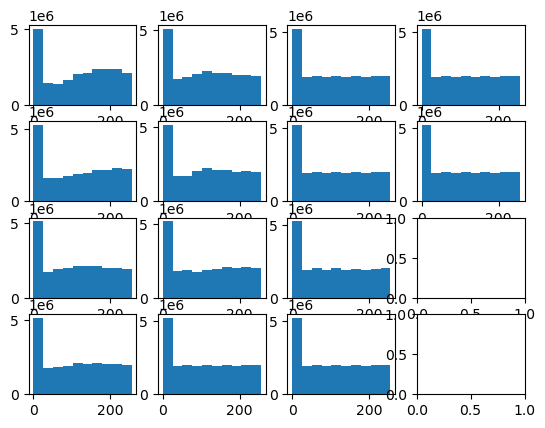

In [34]:
img_flat = img.flatten()
fig, ax = plt.subplots(4,4)

for i in range(14):
    ax[i %4, i // 4].hist( img[i, : , :].flatten())